In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

cacao.columns =['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 
                'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']

In [3]:
display(cacao.head(10))
cacao.info() 

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bar_id            1795 non-null   int64  
 1   company           1795 non-null   object 
 2   specific_origin   1795 non-null   object 
 3   ref               1795 non-null   int64  
 4   review_date       1795 non-null   int64  
 5   cocoa_percent     1795 non-null   object 
 6   company_location  1795 non-null   object 
 7   rating            1795 non-null   float64
 8   bean_type         1794 non-null   object 
 9   broad_origin      1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [2]:
#это столбец индексов батончиков, количество уникальных значений соответствует количеству строк. 
#Вряд ли он пригодится для дальнейшего анализа, удалим его

cacao.drop(['bar_id'], inplace = True, axis = 1)

In [4]:
#Сколько компаний содержит датасет
cacao['company'].value_counts()

                    99
Soma                45
Bonnat              26
Fresco              26
Pralus              25
                    ..
Lajedo do Ouro       1
Eclat (Felchlin)     1
Nanea                1
Pangea               1
Breeze Mill          1
Name: company, Length: 408, dtype: int64

In [4]:
#Попробуем отфильтровать лишние данные и выведем только те компании, у которых в рейтинге больше 10 продуктов

display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
Indi,1
Heilemann,1
Park 75,1
Friis Holm,1


Значений, встретившихся в столбце более 10 раз: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [5]:
#Давайте сделаем то же самое для столбца с местом происхождения какао-бобов.
pd.DataFrame(cacao.specific_origin.value_counts())

display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
Coto Brus,1
"O'ahu, N. Shore, Waialua Estate w/ nibs",1
Pablino,1
"Xocunusco, Chiapas, Pichucalco",1


Значений, встретившихся в столбце более 10 раз: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

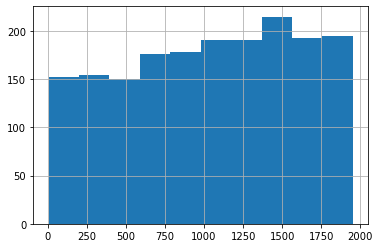

In [6]:
#Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение
cacao.ref.hist()
cacao.ref.describe()

#Как видно, у этого признака распределение без аномалий, выбросов нет. 
#Заметен тренд на возрастание количества отзывов со временем 
#(так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

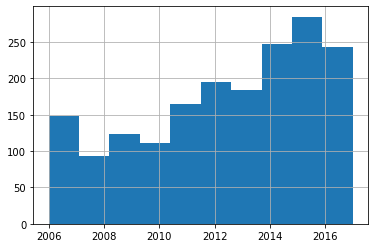

In [7]:
cacao.review_date.hist()
cacao.review_date.describe()
#Здесь также заметен тренд на увеличение ревью со временем

In [8]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [9]:
#Значения в столбцах представлены в виде процентов. 
#Для дальнейшего анализа будет проще, если они будут представлены числами. Трансформируем столбец
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

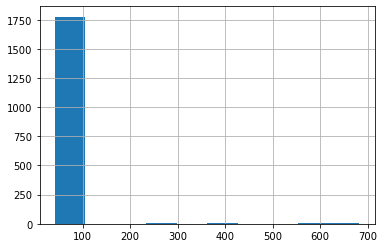

In [10]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()


25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


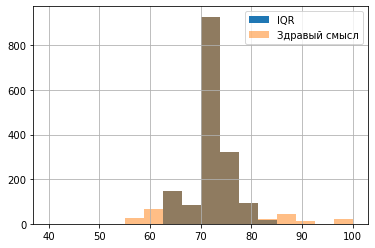

In [11]:
#Видим, что основное распределение лежит между 0 и 100 процентами и есть потенциальные выбросы свыше %.
#Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния
#(межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();

In [ ]:
Однако такой способ отбора выбросов работает не всегда. 
Когда мы знаем потенциальные характеристики распределения, 
лучше отобрать их, пользуясь здравым смыслом. 
Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально реальных значений, 
поэтому воспользуемся здравым смыслом. Очевидно, что при сборе данных произошла ошибка. 
К сожалению, такое случается нередко.

In [12]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [13]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [14]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Wales,1
India,1
Suriname,1
Niacragua,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


In [15]:
#Rating — важный столбец, так как именно рейтинг шоколада будет учиться предсказывать будущая модель.
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

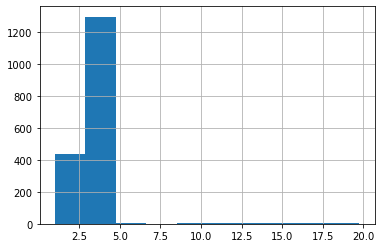

In [16]:
cacao.rating.hist()
cacao.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


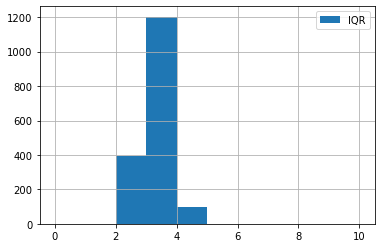

In [17]:
#Проверка на выбросы
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

#Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [18]:
#bean_type Сразу заменим пропуски на None
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [19]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [20]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [21]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
EET,3
Beniano,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [22]:
#broad_origin Сразу заменим пропуски на None
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [23]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
Cameroon,1
"Venezuela, Java",1
nan,1
"South America, Africa",1


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1631 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [24]:
#Обратим внимание, что в столбце много повторяющихся значений с различным написанием
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
Trinidad-Tobago,1
"Trinidad,Ecuador",1
"DomincanRepublic,Madagascar",1
"Venezuela,Bolivia,DomincanRepublic",1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [ ]:
##Корреляционный анализ!!!!

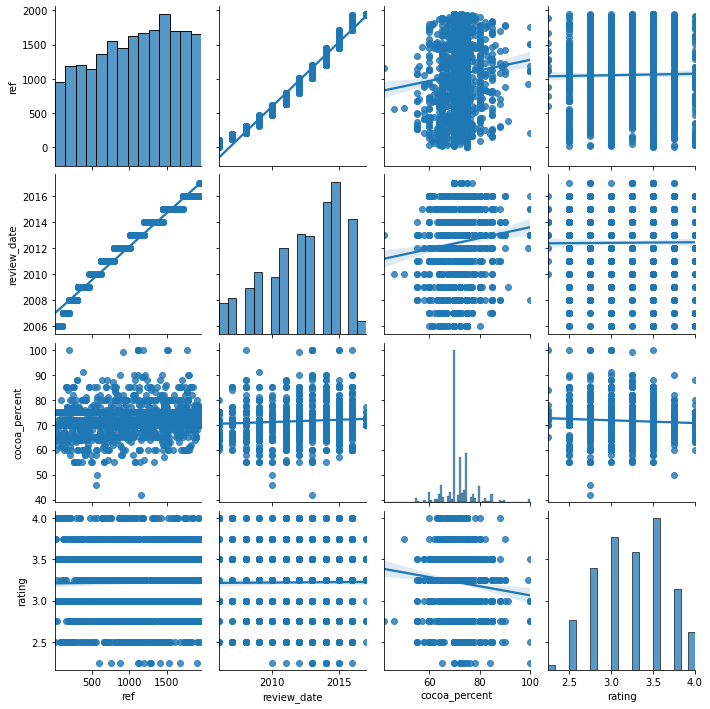

In [25]:
#Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. 
#Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 
#Корреляции рассмотрим только для числовых столбцов
sns.pairplot(cacao, kind = 'reg')

In [26]:
#Используем для наглядности матрицу корреляций
cacao.corr()

#Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. 
#Пусть это будет переменная REF.
#Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.
#Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, 
#что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [ ]:
##Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. 
Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. 
Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных

In [27]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

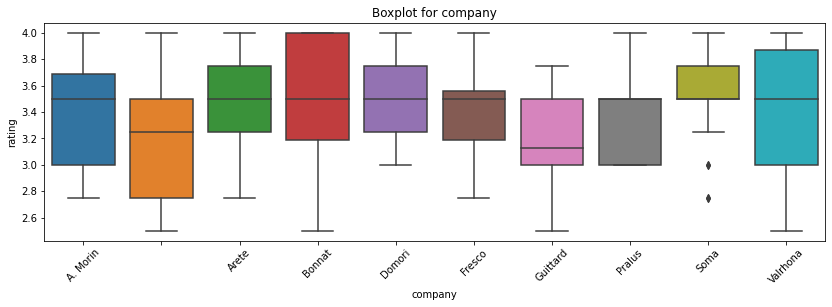

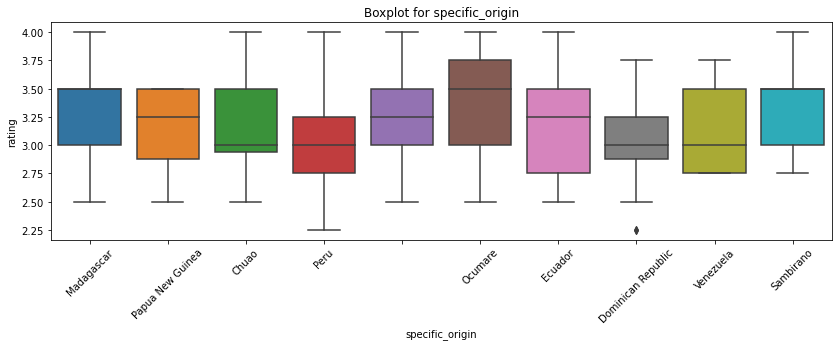

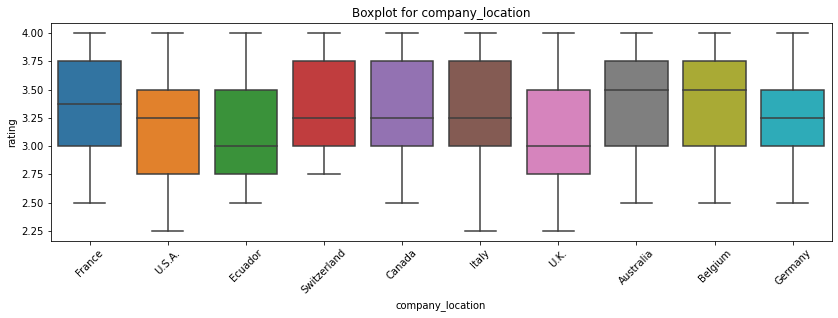

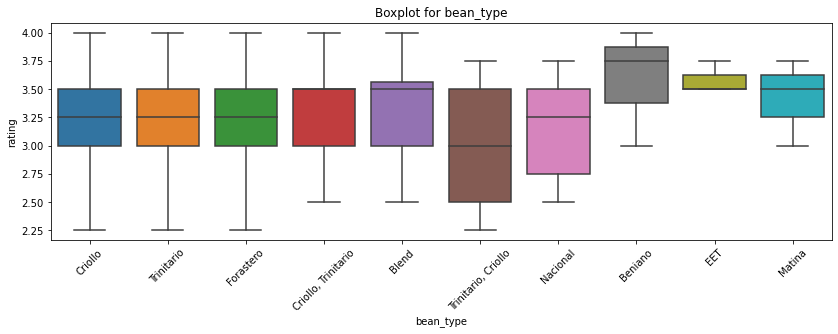

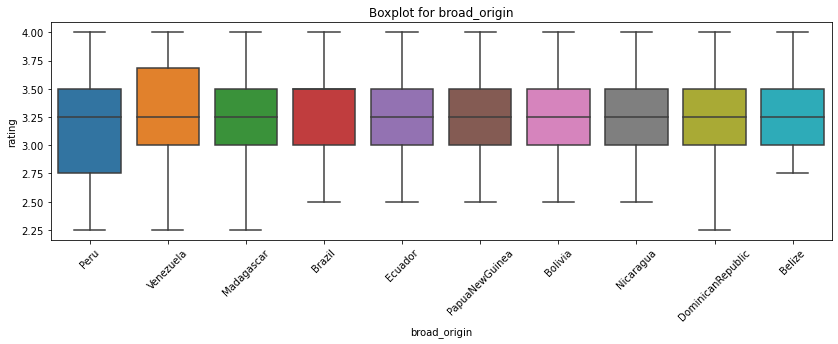

In [28]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

In [29]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [31]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)
    
#Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. 
#Оставим эти переменные в датасете для дальнейшего построения модели. 
#Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 
#company, specific_origin, company_location, review_date, cocoa_percent.

cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0
